## create graph of standardized precipitation index for Colorado, based on SPI calculations from nClimGrid data and the climate indices package

In [1]:
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import numpy as np
import calendar
import datetime

from scipy import stats

### a few user-defined settings, primarily the duration (the n-month SPI). The 24-month SPI was presented in the report, and the data file for that duration is included in the repository

In [2]:
duration="24"  ## should be 2-digits
dist = "pearson"

climdiv_abbrev = "CO"  ## which climate division? use "CO" for whole state, or "CD2" for CD2, etc.

### read in the file and define some metadata

In [3]:
infile = "data/CO_climdiv_spi_"+dist+"_"+duration+".nc"

spi_in = xr.open_dataset(infile)
varname = 'spi_'+dist+'_'+duration
spi_CO = spi_in[varname]

## define some metadata
climdiv_abbrevs=["CO","CD1","CD2","CD3","CD4","CD5"]
climdivs=[5,501,502,503,504,505]
climdiv_names=["State of Colorado", "Arkansas drainage","Colorado drainage","Kansas drainage","Platte drainage","Rio Grande drainage"]
climdiv_nums=[0,1,2,3,4,5]


## plot values for Colorado and climate divisions, based on the averaged values

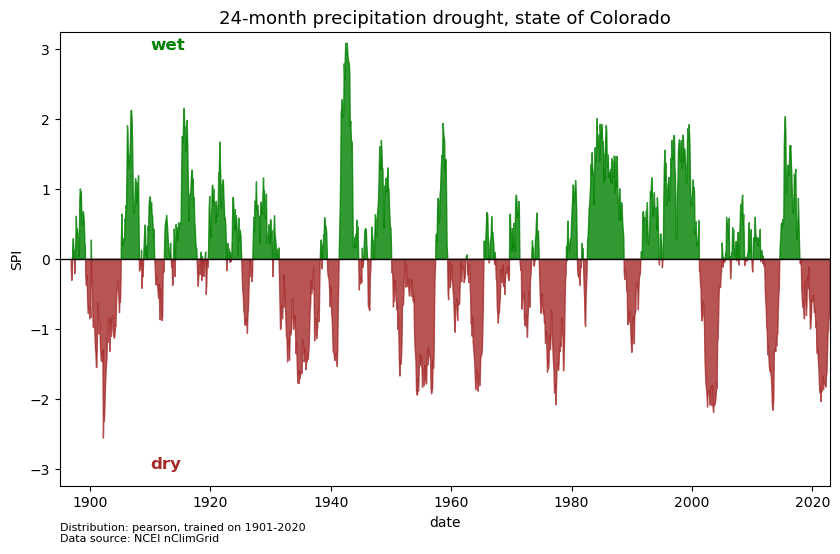

In [6]:
## get other metadata based on the specifications above
climdiv_name = climdiv_names[climdiv_abbrevs.index(climdiv_abbrev)]
climdiv = climdivs[climdiv_abbrevs.index(climdiv_abbrev)]

## choose just this month
data = spi_CO.sel(division=climdiv).to_series().reset_index()

fig, ax = plt.subplots(figsize=(8.5,5.5))

## subset on time?
data = data[data.time < "2022-12-31"]

plt.plot(data.dropna()['time'], data.dropna()[varname], alpha=0)

plt.axhline(y=0, color='black', linewidth=1)

plt.fill_between(data['time'], data[varname], 0,
                 where=(data[varname] >= 0),
                 color='green', alpha=0.8, interpolate=True)
plt.fill_between(data['time'], data[varname], 0,
                 where=(data[varname] <= 0),
                 alpha=0.8, color='brown', interpolate=True)

ax.set_xlabel("date")
ax.set_ylabel("SPI")

if climdiv_abbrev=="CO":
    #title = "Standardized Precipitation Index (SPI)\nstate of Colorado, "+duration+" months"
    title = duration+"-month precipitation drought, state of Colorado"
else:
    title = "Standardized Precipitation Index (SPI)\nColorado climate division "+str(climdiv_num)+", "+duration+" months"


plt.title(title, fontsize=13)
plt.tight_layout()

#ax.set_xlim([datetime.date(1894, 1, 1), datetime.date(2021, 2, 1)])
ax.set_xlim(data.iloc[0]['time'], data.iloc[-1]['time'])
ax.set_ylim(-3.25,3.25)

plt.text(pd.Timestamp(1910,1,1),3,'wet',color='green',fontsize=12,fontweight='bold')
plt.text(pd.Timestamp(1910,1,1),-3,'dry',color='brown',fontsize=12,fontweight='bold')

plt.text(0,-0.1225,'Distribution: '+dist+', trained on 1901-2020\nData source: NCEI nClimGrid',
         fontsize=8,
         transform=ax.transAxes)

plt.show()

fig.savefig("spi_CO_"+str(climdiv_abbrev)+"_"+duration+"_climdivdata_allmonths.png", 
            dpi=250, transparent=False,facecolor='white',bbox_inches='tight')
plt.close('all')